In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Load dataset
# Make sure you are in the main folder('..\Algal-bloom-prediction-machine-learning')
cd = os.getcwd()
if cd.split('\\')[-1]!='Algal-bloom-prediction-machine-learning':
    os.chdir('..')
    cd=os.getcwd()
    
os.chdir('Trainning data')

In [3]:
lakename = input('Lake name in short:')
winter = input('Winter data or not? (Y/N)')
if winter =='Y':
    all_df = pd.read_csv(lakename+'_Observation_df.csv',sep = '\t',parse_dates = ['Date'])
else:
    all_df = pd.read_csv(lakename+'_Observation_df_nowinter.csv',sep = '\t',parse_dates = ['Date'])

Lake name in short:Mueggelsee
Winter data or not? (Y/N)N


In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4643 entries, 0 to 4642
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4643 non-null   datetime64[ns]
 1   thermD                 4643 non-null   float64       
 2   delT                   4643 non-null   float64       
 3   U                      4643 non-null   float64       
 4   AirP                   4643 non-null   float64       
 5   Hum                    4643 non-null   float64       
 6   AirT                   4643 non-null   float64       
 7   SWR                    4643 non-null   float64       
 8   CC                     4643 non-null   float64       
 9   Prec                   4643 non-null   float64       
 10  Ice_d                  4643 non-null   float64       
 11  days from iceoff date  4643 non-null   float64       
 12  MLD                    4643 non-null   float64       
 13  W  

Index(['Date', 'thermD', 'delT', 'U', 'AirP', 'Hum', 'AirT', 'SWR', 'CC',
       'Prec', 'Ice_d', 'days from iceoff date', 'MLD', 'W', 'MM', 'SRP',
       'TotP', 'NH4', 'NO3', 'Si', 'Chl', 'YY'],
      dtype='object')
Number of variables: 1
The variable to visualize: TotP
Y label:TotP ($μg/L$)


Text(0.03, 1.0, '(b)')

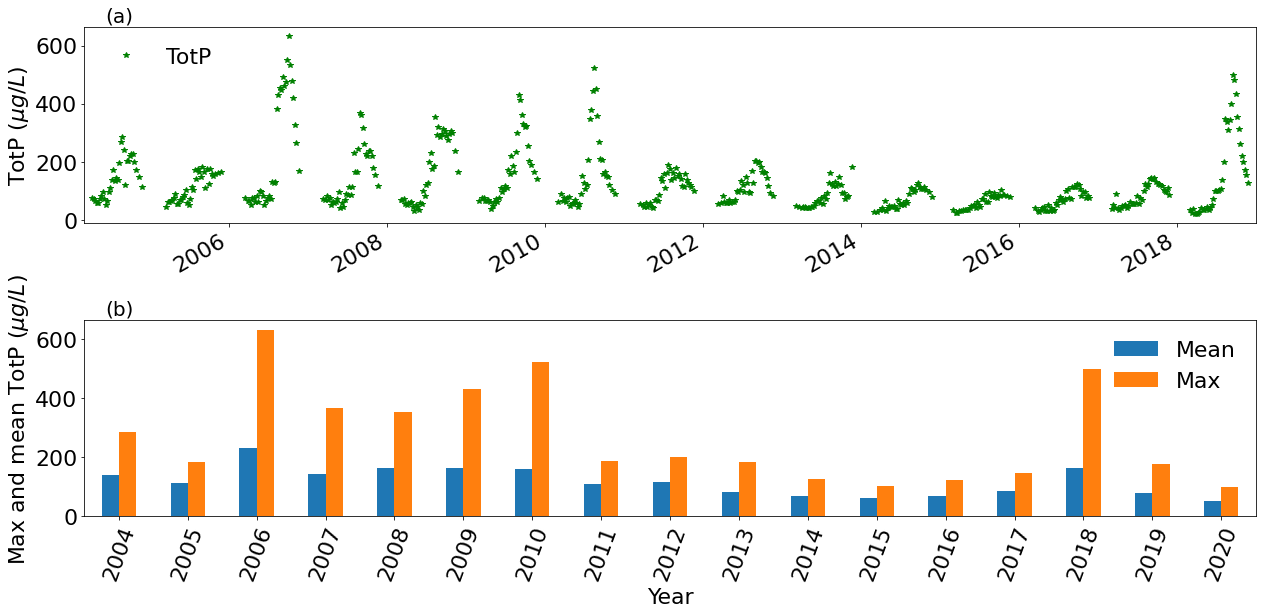

In [7]:
print(all_df.columns)
n_var=int(input('Number of variables: '))
variable=[]
for i in range(n_var):
    v=input('The variable to visualize: ')
    variable.append(v)
    
fig,ax=plt.subplots(nrows=2,ncols=1,tight_layout=True,figsize=(18,9))
plt.rcParams.update({'font.size': 22})
all_df.plot(x = 'Date',y = variable,style=['g*'],ax=ax[0])
ax[0].legend(frameon=False)
ax[0].set_ylabel(input('Y label:'))
ax[0].set_xlim(pd.Timestamp(2004,3,1),pd.Timestamp(2019,1,1))
ax[0].set_title('(a)',x=0.03,fontsize=20)
ax[0].set_xlabel('')

all_df['YY']=all_df['Date'].apply(lambda d:d.year)
Nut=pd.concat([all_df.groupby('YY').mean()[v],all_df.groupby('YY').max()[v]],axis=1)
Nut.columns=['Mean','Max']
Nut.plot(kind='bar',ylabel=('Max and mean '+v+' ($μg/L$)'),xlabel=('Year'),ax=ax[1],rot=70)
ax[1].legend(frameon=False)
ax[1].set_xlabel('Year')
ax[1].set_title('(b)',x=0.03,fontsize=20)

In [8]:
fig.savefig(lakename+'_TotP_multiannual and seasonal pattern.png',dpi=500)